Objective of this project is to build a classification model based on artificial neural network(ANN) for various element of clothes. I used popular dataset called [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). 

My dataset consist of 60 000 images of various element of clothes with labels in training set and 10 000 elements in test set. Every images is 28xs28 in gray scale and is represented by one of the ten classes:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |



### Import and exploration of data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set()
tf.__version__

'2.6.0'

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

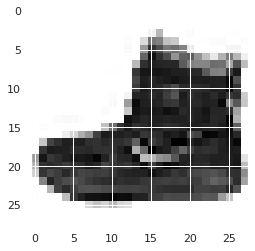

Label ->  9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 23

In [ ]:
# Show example of one of the images with

plt.imshow(x_train[0], cmap='gray_r') 
plt.show()
print("Label -> ",y_train[0])
print(x_train[0])

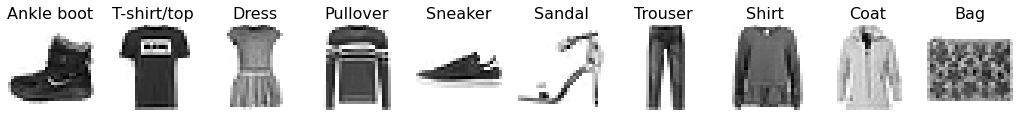

In [ ]:
# Show every examples of every part of clothes with labels

clothes_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
                'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
ind = 0
i=1
list_of_clothes = [] 

plt.figure(figsize=(18, 13))
while len(list_of_clothes) < 10: 

  if y_train[ind] not in list_of_clothes: 

    list_of_clothes.append(y_train[ind]) 
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(x_train[ind], cmap='gray_r')
    plt.title(clothes_name[y_train[ind]], color='black', fontsize=16)

    i+=1
  ind+=1

In [ ]:
# Standarization 

x_train = x_train / 255.
x_test = x_test / 255.

### Model - 3 layers

In [ ]:
# Building a model from 3 layers include 1 layer 

model_3 = Sequential()
model_3.add(Flatten(input_shape=(28, 28))) #thanks this layer our matrix is transposed into vector
model_3.add(Dense(units=128, activation='relu'))
model_3.add(Dense(units=10, activation='softmax')) # 10 because ten various labels to predict


model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)

history_3 = model_3.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.2, callbacks=[es])

Epoch 1/20
4800/4800 [==============================] - 11s 2ms/step - loss: 0.4948 - accuracy: 0.8227 - val_loss: 0.4045 - val_accuracy: 0.8492
Epoch 2/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3744 - accuracy: 0.8638 - val_loss: 0.4170 - val_accuracy: 0.8533
Epoch 3/20
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3363 - accuracy: 0.8757 - val_loss: 0.3483 - val_accuracy: 0.8747
Epoch 4/20
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3139 - accuracy: 0.8835 - val_loss: 0.3455 - val_accuracy: 0.8735
Epoch 5/20
4800/4800 [==============================] - 11s 2ms/step - loss: 0.2968 - accuracy: 0.8899 - val_loss: 0.3607 - val_accuracy: 0.8746
Epoch 6/20
4800/4800 [==============================] - 10s 2ms/step - loss: 0.2826 - accuracy: 0.8939 - val_loss: 0.3235 - val_accuracy: 0.8878
Epoch 7/20
4800/4800 [==============================] - 11s 2ms/step - loss: 0.2686 - accuracy: 0.8990 - val_loss: 0.3341 - val_acc

### Model 4 - layers

In [ ]:
# Building a model from 3 layers include 1 layer 

model_4 = Sequential()
model_4.add(Flatten(input_shape=(28, 28))) #thanks this layer our matrix is transposed into vector
model_4.add(Dense(units=28, activation='relu'))
model_4.add(Dense(units=18, activation='sigmoid'))
model_4.add(Dense(units=10, activation='softmax')) # 10 because ten various labels to predict


model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 28)                21980     
_________________________________________________________________
dense_3 (Dense)              (None, 18)                522       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                190       
Total params: 22,692
Trainable params: 22,692
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)

history_4 = model_4.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.2, callbacks=[es])

Epoch 1/20
4800/4800 [==============================] - 10s 2ms/step - loss: 0.6694 - accuracy: 0.7834 - val_loss: 0.4737 - val_accuracy: 0.8310
Epoch 2/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.4328 - accuracy: 0.8491 - val_loss: 0.4248 - val_accuracy: 0.8491
Epoch 3/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3919 - accuracy: 0.8622 - val_loss: 0.3895 - val_accuracy: 0.8602
Epoch 4/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3710 - accuracy: 0.8680 - val_loss: 0.4209 - val_accuracy: 0.8452
Epoch 5/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3531 - accuracy: 0.8740 - val_loss: 0.3691 - val_accuracy: 0.8689
Epoch 6/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3415 - accuracy: 0.8770 - val_loss: 0.3651 - val_accuracy: 0.8688
Epoch 7/20
4800/4800 [==============================] - 9s 2ms/step - loss: 0.3294 - accuracy: 0.8814 - val_loss: 0.3562 - val_accuracy

### Graphical comparison of models

In [ ]:
df_3 = pd.DataFrame(history_3.history)
df_3['epoch'] = history_3.epoch
print(df_3.head())

df_4 = pd.DataFrame(history_4.history)
df_4['epoch'] = history_4.epoch
print(df_4.head())

      loss  accuracy  val_loss  val_accuracy  epoch
0 0.494756  0.822750  0.404506      0.849167      0
1 0.374378  0.863833  0.417007      0.853333      1
2 0.336348  0.875667  0.348266      0.874667      2
3 0.313864  0.883542  0.345520      0.873500      3
4 0.296792  0.889938  0.360668      0.874583      4
      loss  accuracy  val_loss  val_accuracy  epoch
0 0.669421  0.783375  0.473711      0.831000      0
1 0.432838  0.849083  0.424817      0.849083      1
2 0.391875  0.862167  0.389468      0.860167      2
3 0.370979  0.867958  0.420891      0.845167      3
4 0.353087  0.874000  0.369076      0.868917      4


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("<b>3 layers</b>", "<b>4 layers</b>", "", ""))


fig.add_trace(go.Scatter(x=df_3['epoch'], y=df_3['accuracy'], name='accuracy - 3 layers'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_3['epoch'], y=df_3['val_accuracy'], name='val_accuracy'), row=1, col=1)

fig.add_trace(go.Scatter(x=df_4['epoch'], y=df_4['accuracy'], name='accuracy - 4 layers'), row=1, col=2)
fig.add_trace(go.Scatter(x=df_4['epoch'], y=df_4['val_accuracy'], name='val_accuracy'), row=1, col=2)

fig.add_trace(go.Scatter(x=df_3['epoch'], y=df_3['loss'], name='loss - 3 layers'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_3['epoch'], y=df_3['val_loss'], name='val_loss'), row=2, col=1)

fig.add_trace(go.Scatter(x=df_4['epoch'], y=df_4['loss'], name='loss - 4 layers'), row=2, col=2)
fig.add_trace(go.Scatter(x=df_4['epoch'], y=df_4['val_loss'], name='val_loss'), row=2, col=2)


fig.update_yaxes(title_text="Accuracy", row=1, col=1)

fig.update_yaxes(title_text="Loss", row=2, col=1)





fig.update_xaxes(title_text='epochs')
fig.update_layout(width=1500, title='<b>Accuracy and Loss</b>', titlefont=dict(size =19, color='black', family='Arial, sans-serif'))
fig.show()

### Choice model and prediction

As we can see at figures both models are near equivalent to each other with accuracy and loss. Becouse model with 3 layers is faster it was selected for prediction on test set

In [ ]:
loss, accuracy = model_3.evaluate(x_test, y_test, verbose=0)
print(accuracy)

0.8776000142097473


In [ ]:
pd.DataFrame(model_3.predict(x_test)).head()

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000646,0.000000,0.001951,0.000000,0.997403
1,0.000004,0.000000,0.998051,0.000000,0.001465,0.000000,0.000480,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.063790,0.000000,0.011130,0.000385,0.000605,0.000006,0.924069,0.000003,0.000012,0.000000


In [ ]:
dir(model_3)


['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_check_call_args',
 '_checkpoint_dependencies',
 '_clear_los